<a href="https://colab.research.google.com/github/mauloredo/Challenge_Telecom_X2/blob/main/x2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRODUCCIÓN

## CONTROL DE VERSIONES DEL DATAFRAME

**datos_x2**  Dataframe importado del projecto anterior

**datos** Dataframe con columnas object a category, como estaban originalmente

**datos_v1** Dataframe sin las columnas TotalCharges, Cuentas_Diarias y PhoneServices

**datos_v2** Se transforma nuevamente de object a categories

**data** Datframe despues de One-Hot Encoding y LabelEncoder

**data_2** Dataframe después de StandardScaler

**model_x** Dataframe sin variables redundantes

## CONTROL DE OBJETOS

FASE O

Tipo	              Nombre del archivo

Histograma	        hist_tenure_churn.png

Histograma	        hist_monthlycharges_churn.png

Histograma	        hist_totalcharges_churn.png

Boxplot	            boxplot_tenure_churn.png

Boxplot	            boxplot_monthlycharges_churn.png

Boxplot	            boxplot_totalcharges_churn.png

gender	            catplot_gender_churn.png

SeniorCitizen	      catplot_seniorcitizen_churn.png

Partner	            catplot_partner_churn.png

Dependents	        catplot_dependents_churn.png

Contract	          catplot_contract_churn.png

PaymentMethod	      catplot_paymentmethod_churn.png

InternetService	    catplot_internetservice_churn.png

PhoneService	      catplot_phoneservice_churn.png

MultipleLines	catplot_multiplelines_churn.png

OnlineSecurity	catplot_onlinesecurity_churn.png

OnlineBackup	catplot_onlinebackup_churn.png


DeviceProtection	catplot_deviceprotection_churn.png

TechSupport	catplot_techsupport_churn.png

StreamingTV	catplot_streamingtv_churn.png

StreamingMovies	catplot_streamingmovies_churn.png

PaperlessBilling	catplot_paperlessbilling_churn.png

## DESCRIPCIÓN DEL DESAFÍO



Telecom X – Parte 2: Predicción de Cancelación (Churn)

📣 Historia del Desafío

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

    Preparar los datos para el modelado (tratamiento, codificación, normalización).

    Realizar análisis de correlación y selección de variables.

    Entrenar dos o más modelos de clasificación.

    Evaluar el rendimiento de los modelos con métricas.

    Interpretar los resultados, incluyendo la importancia de las variables.

    Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

🧰 Lo que vas a practicar

✅ Preprocesamiento de datos para Machine Learning
✅ Construcción y evaluación de modelos predictivos
✅ Interpretación de resultados y entrega de insights
✅ Comunicación técnica con enfoque estratégico

🚀 Ahora eres: Analista Junior de Machine Learning

Telecom X confía en tu entrega para dar los próximos pasos hacia una solución de inteligencia predictiva eficaz. ¡Buena suerte!
Comentarios y Actividad

## 1. CARGA Y EXPLORACIÓN INICIAL DE DATOS

### Importar el dataset desde el repositorio.

In [6]:
import requests
from io import BytesIO
import pandas as pd

raw_url = 'https://raw.githubusercontent.com/mauloredo/Challenge_Telecom_X2/refs/heads/main/data_x2.csv'

print(f"Attempting to download data from: {raw_url}")

try:
    response = requests.get(raw_url)
    response.raise_for_status()

    datos_x2 = pd.read_csv(BytesIO(response.content))

    print("File downloaded and loaded successfully!")
    print("DataFrame shape:", datos_x2.shape)
    print("\nDataFrame head:")
    print(datos_x2.head())

except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
    print("Please ensure the raw URL is correct and the file exists in the repository.")

Attempting to download data from: https://raw.githubusercontent.com/mauloredo/Challenge_Telecom_X2/refs/heads/main/data_x2.csv
File downloaded and loaded successfully!
DataFrame shape: (7043, 21)

DataFrame head:
   Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  False  Female          False     Yes        Yes       9          Yes   
1  False    Male          False      No         No       9          Yes   
2   True    Male          False      No         No       4          Yes   
3   True    Male           True     Yes         No      13          Yes   
4   True  Female           True     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1           Yes             DSL             No  ...               No   
2            No     Fiber optic             No  ...              Yes   
3            No     Fiber optic             No  

### Verificar dimensiones, tipos de datos y valores nulos.


In [7]:
# Verificar dimensiones del DataFrame
print(f"Filas: {datos_x2.shape[0]} | Columnas: {datos_x2.shape[1]}")

# Mostrar nombres de columnas
print("\n📋 Lista de columnas:")
print(datos_x2.columns.tolist())

# Tipos de datos por columna
print("\n🔧 Tipos de datos:")
print(datos_x2.dtypes)

# Recuento de valores nulos por columna
print("\n🧯 Valores nulos por columna:")
print(datos_x2.isnull().sum())

# Verificar valores únicos por columna (ideal para detectar categóricas)
print("\n🔎 Valores únicos por columna:")
print(datos_x2.nunique())

# Estadísticas descriptivas de columnas numéricas
print("\n📊 Estadísticas numéricas:")
print(datos_x2.describe())

# Estadísticas para columnas categóricas (si existen)
print("\n📊 Estadísticas categóricas:")
print(datos_x2.describe(include='object'))



Filas: 7043 | Columnas: 21

📋 Lista de columnas:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Cuentas_diarias']

🔧 Tipos de datos:
Churn                  bool
gender               object
SeniorCitizen          bool
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Cuentas_diarias     float64
dtype: object



Después del análisis exploratiorio se encuentra que los tipos de variables del dataframe difieren con el archivo original, Puede ser que en la importación

Data columns (total 20 columns):
 ind   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7043 non-null   bool    
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 non-null   category
 17  PaymentMethod     7043 non-null   category
 18  MonthlyCharges    7043 non-null   float64
 19  TotalCharges      7043 non-null   object  

Churn                  bool
gender               object
SeniorCitizen          bool
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Cuentas_diarias     float64

Por el momento, las columnas se quedarán así ya qeu mas adelante, si decidimos incluirlas para el análisis, se convertirán con alguno de los métodos One-Hot o Label Encoder. Sin embargo se revisan los datos de estas columnas a continuación.

In [8]:
# Obtener columnas categóricas
cat_cols = datos_x2.select_dtypes(include='object').columns

# Obtener número total de filas
total_filas = datos_x2.shape[0]

for col in cat_cols:
    print(f"\n📂 Columna: {col}")

    # Mostrar valores únicos
    uniques = datos_x2[col].unique()
    print("Valores únicos:", uniques)
    print("Cantidad de únicos:", datos_x2[col].nunique())

    # Mostrar frecuencia de cada valor
    value_counts = datos_x2[col].value_counts(dropna=False)
    print("\n📊 Frecuencia de cada valor:")
    print(value_counts)

    # Sumar total de frecuencias
    suma_total = value_counts.sum()
    print(f"\n🧾 Suma total de valores: {suma_total}")

    # Validar coincidencia con número de filas
    if suma_total == total_filas:
        print("✅ La suma de frecuencias coincide con el total de filas.")
    else:
        print("⚠️ La suma NO coincide con el total de filas. Revisar posibles errores o valores perdidos.")





📂 Columna: gender
Valores únicos: ['Female' 'Male']
Cantidad de únicos: 2

📊 Frecuencia de cada valor:
gender
Male      3555
Female    3488
Name: count, dtype: int64

🧾 Suma total de valores: 7043
✅ La suma de frecuencias coincide con el total de filas.

📂 Columna: Partner
Valores únicos: ['Yes' 'No']
Cantidad de únicos: 2

📊 Frecuencia de cada valor:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

🧾 Suma total de valores: 7043
✅ La suma de frecuencias coincide con el total de filas.

📂 Columna: Dependents
Valores únicos: ['Yes' 'No']
Cantidad de únicos: 2

📊 Frecuencia de cada valor:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

🧾 Suma total de valores: 7043
✅ La suma de frecuencias coincide con el total de filas.

📂 Columna: PhoneService
Valores únicos: ['Yes' 'No']
Cantidad de únicos: 2

📊 Frecuencia de cada valor:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

🧾 Suma total de valores: 7043
✅ La suma de frecuencias coincide con el total d

In [9]:
print(type(datos_x2))

<class 'pandas.core.frame.DataFrame'>


In [10]:
print("Shape:", datos_x2.shape)
print("¿Está vacío?:", datos_x2.empty)

Shape: (7043, 21)
¿Está vacío?: False


In [11]:
# Transformación de tipos y renombrado del DataFrame

# 1. Convertir columnas object a category en datos_x2
object_columns = datos_x2.select_dtypes(include=['object']).columns
for col in object_columns:
    datos_x2[col] = datos_x2[col].astype('category')

# 2. Renombrar el DataFrame a 'datos'
datos = datos_x2.copy()

# Verificación
print("\nTipos de datos después de la conversión:")
print(datos.dtypes)
print("\nNombre del DataFrame:", [name for name in globals() if globals()[name] is datos])

# 3. Guardar el DataFrame procesado
output_filename = 'datos.csv'
datos.to_csv(output_filename, index=False)
print(f"\nDataFrame guardado como '{output_filename}'")




Tipos de datos después de la conversión:
Churn                   bool
gender              category
SeniorCitizen           bool
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Cuentas_diarias      float64
dtype: object

Nombre del DataFrame: ['datos']

DataFrame guardado como 'datos.csv'


###  Estadísticas descriptivas

In [12]:
# Estadísticas descriptivas para variables numéricas
print(datos[['tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_diarias']].describe())

# Estadísticas para variables categóricas
print("\nDistribución de categorías:")
for col in datos.select_dtypes(include=['category', 'bool']).columns:
    print(f"\n{col}:")
    print(datos[col].value_counts(normalize=True))


            tenure  MonthlyCharges  TotalCharges  Cuentas_diarias
count  7043.000000     7043.000000   7043.000000      7043.000000
mean     32.371149       64.761692   2279.734304         2.158723
std      24.559481       30.090047   2266.794470         1.003002
min       0.000000       18.250000      0.000000         0.608333
25%       9.000000       35.500000    398.550000         1.183333
50%      29.000000       70.350000   1394.550000         2.345000
75%      55.000000       89.850000   3786.600000         2.995000
max      72.000000      118.750000   8684.800000         3.958333

Distribución de categorías:

Churn:
Churn
False    0.73463
True     0.26537
Name: proportion, dtype: float64

gender:
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

SeniorCitizen:
SeniorCitizen
False    0.837853
True     0.162147
Name: proportion, dtype: float64

Partner:
Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

Dependents:
Dependents
No 

## FASE 0: Análisis Exploratorio Básico (Antes de la Limpieza)

Objetivo: Realizar un análisis exploratorio para entender las distribuciones, detectar outliers, y obtener estadísticas descriptivas de los datos.

🪜 Pasos:

**Estadísticas descriptivas iniciales:**

Obtener resumen de las estadísticas básicas (mean, std, min, max, etc.) para todas las variables numéricas, con especial atención a las variables como MonthlyCharges, TotalCharges, tenure, etc.

Distribuciones de las variables numéricas
Graficar distribuciones de las variables numéricas:

    - tenure

    - MonthlyCharges

    - TotalCharges

**Buscar outliers y patrones inusuales:**

Boxplots para detectar outliers:
Crear boxplots para identificar valores atípicos en las variables numéricas.

**Distribuciones de variables categóricas:**
Graficar la distribución de las variables categóricas:

    - gender, SeniorCitizen, Partner, Dependents, etc.
    - Contar los valores únicos y sus frecuencias.

**Correlación de variables numéricas:**
Generar un mapa de calor de correlación para observar qué variables numéricas están más correlacionadas entre sí.

In [13]:
# Estadísticas descriptivas de las variables numéricas
print(datos.describe())


            tenure  MonthlyCharges  TotalCharges  Cuentas_diarias
count  7043.000000     7043.000000   7043.000000      7043.000000
mean     32.371149       64.761692   2279.734304         2.158723
std      24.559481       30.090047   2266.794470         1.003002
min       0.000000       18.250000      0.000000         0.608333
25%       9.000000       35.500000    398.550000         1.183333
50%      29.000000       70.350000   1394.550000         2.345000
75%      55.000000       89.850000   3786.600000         2.995000
max      72.000000      118.750000   8684.800000         3.958333


### Variables Numéricas

Customized Histogram for tenure

    - Bins: Use ~24 bins to reflect customer lifecycle (every ~3 months)

    - Goal: See if churn is more frequent among newer customers

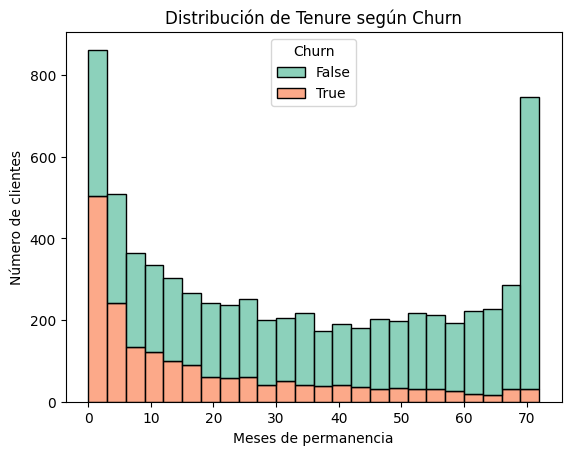

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame
datos = pd.read_csv('datos.csv')

sns.histplot(data=datos, x='tenure', hue='Churn', multiple='stack', bins=24, palette='Set2')
plt.title("Distribución de Tenure según Churn")
plt.xlabel("Meses de permanencia")
plt.ylabel("Número de clientes")
plt.savefig("hist_tenure_churn.png")
plt.show()


Customized Histogram for MonthlyCharges

    - Bins: Use ~20 bins to reflect billing brackets (e.g., $5 or $10 increments)

    - Goal: Are customers with higher/lower charges more likely to churn?



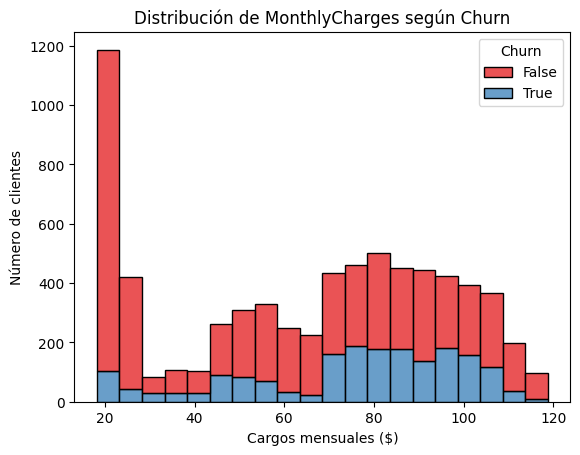

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=datos, x='MonthlyCharges', hue='Churn', multiple='stack', bins=20, palette='Set1')
plt.title("Distribución de MonthlyCharges según Churn")
plt.xlabel("Cargos mensuales ($)")
plt.ylabel("Número de clientes")
plt.savefig("hist_monthlycharges_churn.png")
plt.show()


Customized Histogram for TotalCharges

    - Bins: Fewer bins (~30) due to wide range

    - Extra: Log scale helps reduce right-skew effect

    - Goal: Is churn higher for lower total lifetime value?

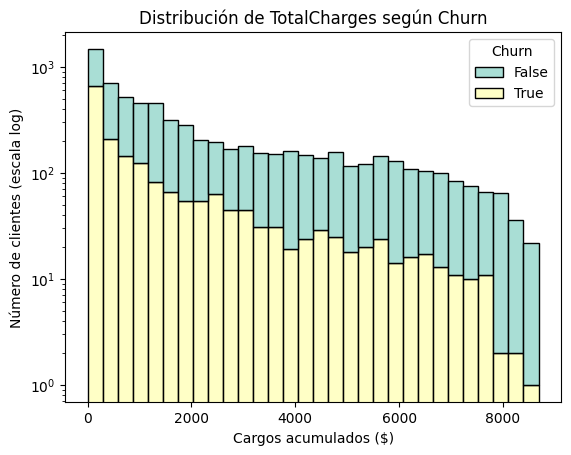

In [16]:
sns.histplot(data=datos, x='TotalCharges', hue='Churn', multiple='stack', bins=30, palette='Set3')
plt.yscale('log')  # Optional: use log scale to see low-frequency zones
plt.title("Distribución de TotalCharges según Churn")
plt.xlabel("Cargos acumulados ($)")
plt.ylabel("Número de clientes (escala log)")
plt.savefig("hist_totalcharges_churn.png")
plt.show()


Boxplot Tenure vs Churn

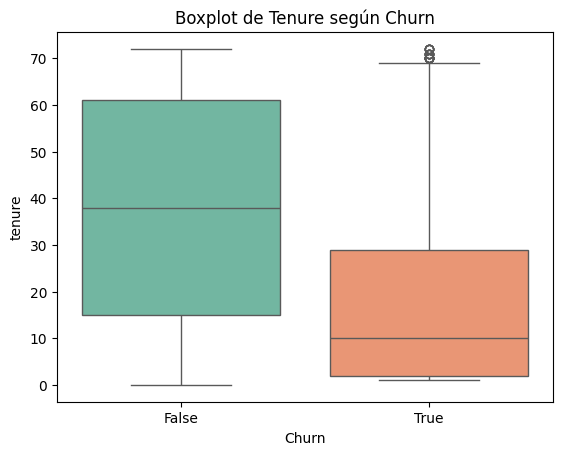

In [17]:
sns.boxplot(data=datos, x='Churn', y='tenure', hue='Churn', palette='Set2', legend=False)
plt.title("Boxplot de Tenure según Churn")
plt.savefig("boxplot_tenure_churn.png")
plt.show()


Boxplot MonthlyCharges vs Churn

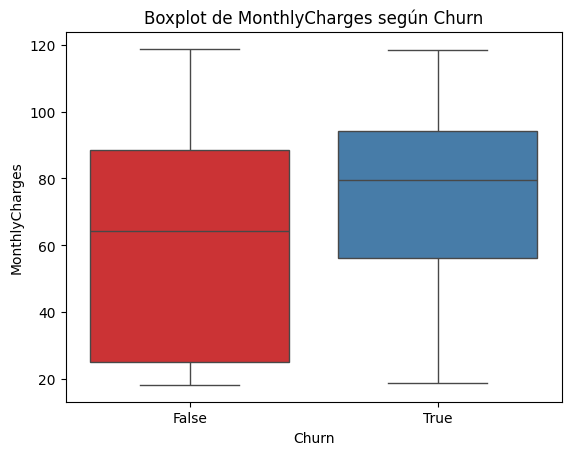

In [18]:
sns.boxplot(data=datos, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set1', legend=False)
plt.title("Boxplot de MonthlyCharges según Churn")
plt.savefig("boxplot_monthlycharges_churn.png")
plt.show()


Boxplot TotalCharges vs Churn

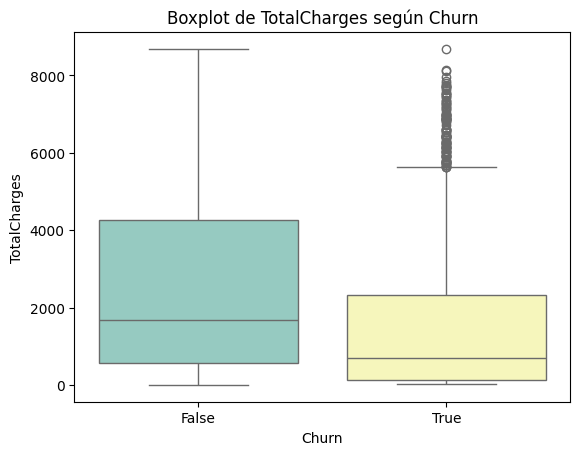

In [19]:
sns.boxplot(data=datos, x='Churn', y='TotalCharges', hue='Churn', palette='Set3', legend=False)
plt.title("Boxplot de TotalCharges según Churn")
plt.savefig("boxplot_totalcharges_churn.png")
plt.show()


Recap Variables Numéricas:

    - tenure mostró una alta concentración de clientes con pocos meses de servicio.

    - Insight: Muchos clientes que cancelan lo hacen temprano.

    - MonthlyCharges presentó una posible relación entre precios altos y mayor churn.

    - Clientes con cargos altos tienden a cancelar más.

    - TotalCharges estuvo altamente sesgado hacia valores bajos.

    - Clientes con poca inversión total tienden a cancelar más.

    - Boxplot Tenure vs Churn: Clientes que cancelan tienen menor permanencia.

    - MonthlyCharges vs Churn: Distribución más amplia en clientes que cancelan.

    - TotalCharges vs Churn: Clientes con mayor gasto tienden a quedarse.

💡 Insights generales hasta ahora:

    La permanencia (tenure) parece ser uno de los factores más fuertes relacionados con la cancelación.

    Clientes con cargos mensuales altos muestran mayor propensión al churn.

    TotalCharges también refleja esto: clientes con historial de gasto bajo son más propensos a cancelar.

    El comportamiento observado respalda la idea de que churn ocurre temprano en el ciclo del cliente, y es más común en segmentos de alto costo y bajo valor acumulado.




### Variables Categóricas Principales

Como punto de partida se evalúan las siguients categorías
   
    - gender

    - SeniorCitizen

    - Partner

    - Dependents

    - Contract

    - PaymentMethod

    - InternetService

Distribución de gender según churn

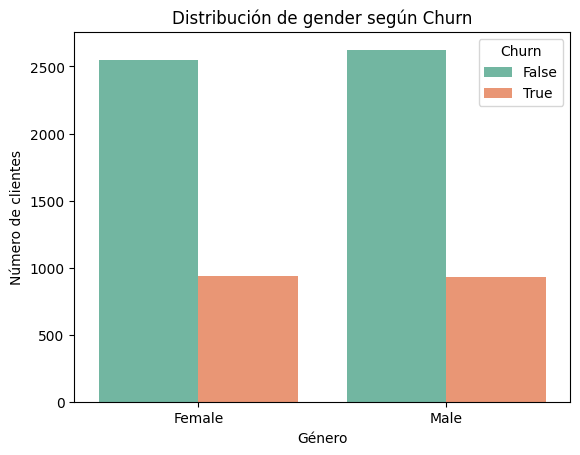

In [20]:
sns.countplot(data=datos, x='gender', hue='Churn', palette='Set2')
plt.title("Distribución de gender según Churn")
plt.xlabel("Género")
plt.ylabel("Número de clientes")
plt.savefig("catplot_gender_churn.png")
plt.show()


Distribución de SeniorCitizen según Churn

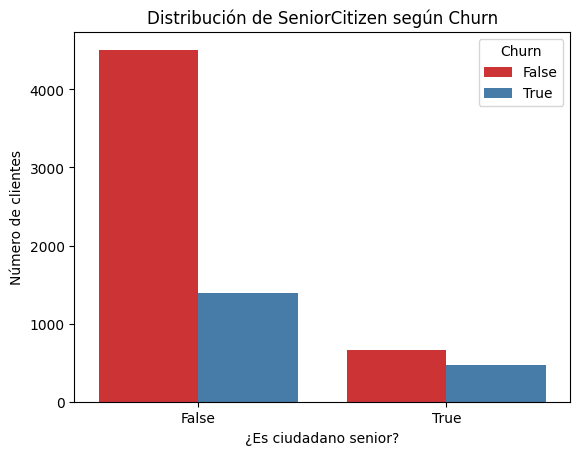

In [21]:
sns.countplot(data=datos, x='SeniorCitizen', hue='Churn', palette='Set1')
plt.title("Distribución de SeniorCitizen según Churn")
plt.xlabel("¿Es ciudadano senior?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_seniorcitizen_churn.png")
plt.show()


Distribución de Partner según Churn

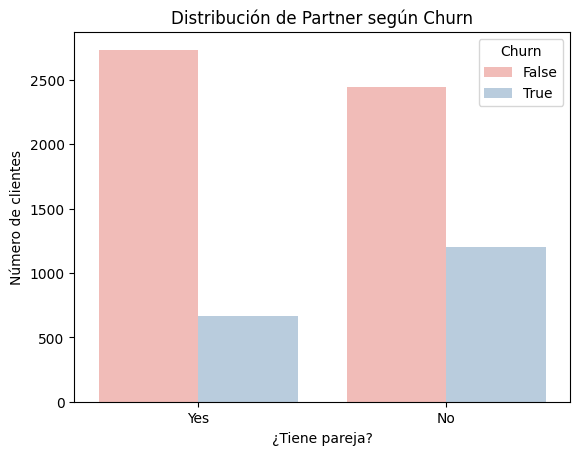

In [22]:
sns.countplot(data=datos, x='Partner', hue='Churn', palette='Pastel1')
plt.title("Distribución de Partner según Churn")
plt.xlabel("¿Tiene pareja?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_partner_churn.png")
plt.show()


Distribución de Dependents según Churn

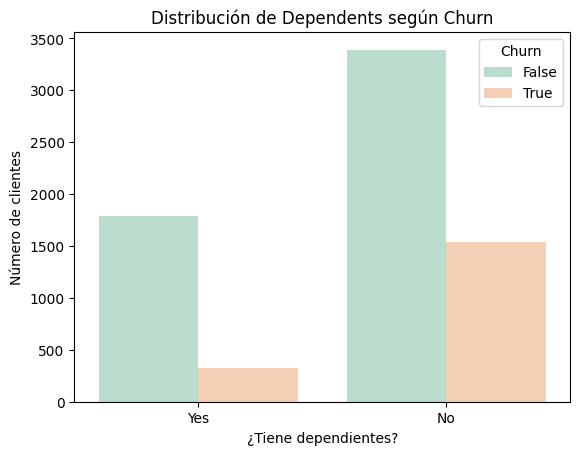

In [23]:
sns.countplot(data=datos, x='Dependents', hue='Churn', palette='Pastel2')
plt.title("Distribución de Dependents según Churn")
plt.xlabel("¿Tiene dependientes?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_dependents_churn.png")
plt.show()


Distribución de Contract según Churn

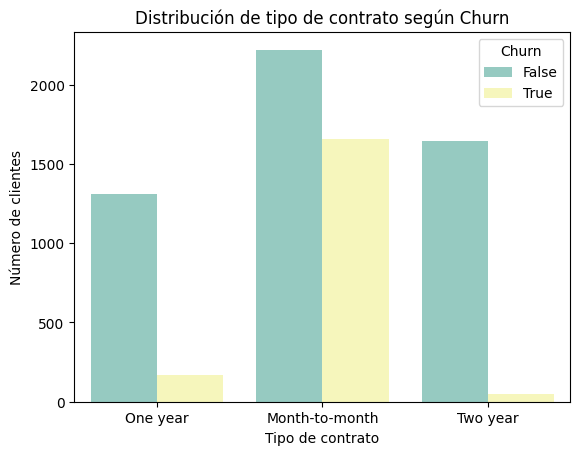

In [24]:
sns.countplot(data=datos, x='Contract', hue='Churn', palette='Set3')
plt.title("Distribución de tipo de contrato según Churn")
plt.xlabel("Tipo de contrato")
plt.ylabel("Número de clientes")
plt.savefig("catplot_contract_churn.png")
plt.show()


Distribución de PaymentMethod según Churn

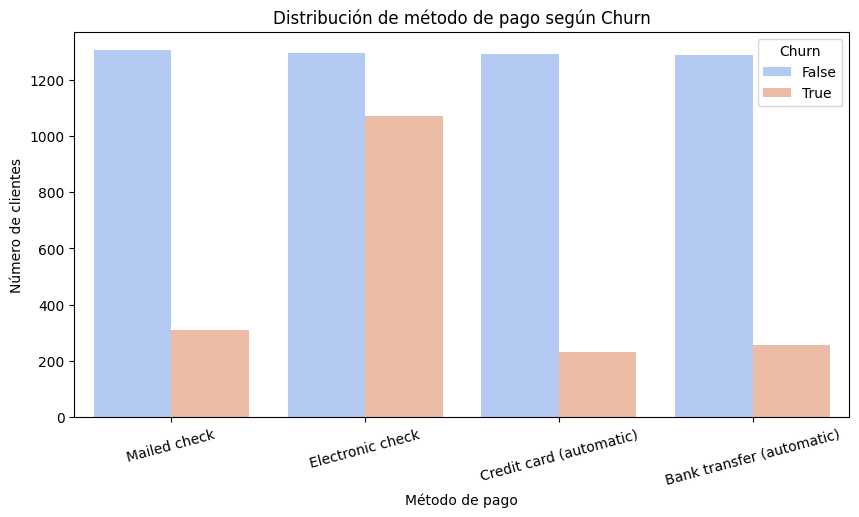

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=datos, x='PaymentMethod', hue='Churn', palette='coolwarm')
plt.title("Distribución de método de pago según Churn")
plt.xlabel("Método de pago")
plt.ylabel("Número de clientes")
plt.xticks(rotation=15)
plt.savefig("catplot_paymentmethod_churn.png")
plt.show()


Distribución de InternetService según Churn

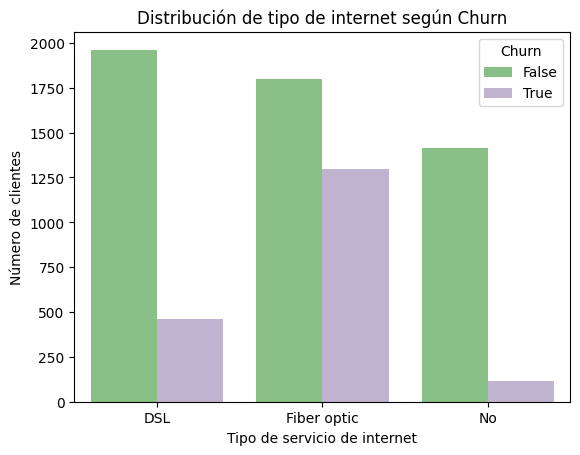

In [26]:
sns.countplot(data=datos, x='InternetService', hue='Churn', palette='Accent')
plt.title("Distribución de tipo de internet según Churn")
plt.xlabel("Tipo de servicio de internet")
plt.ylabel("Número de clientes")
plt.savefig("catplot_internetservice_churn.png")
plt.show()


plt.figure(figsize=(10,5))
sns.countplot(data=datos, x='PaymentMethod', hue='Churn', palette='coolwarm')
plt.title("Distribución de método de pago según Churn")
plt.xlabel("Método de pago")
plt.ylabel("Número de clientes")
plt.xticks(rotation=15)
plt.savefig("catplot_paymentmethod_churn.png")
plt.show()


 **Variables Categóricas de Perfil Demográfico y Contratación**

(antes llamadas “principales”)

Estas variables están asociadas al perfil del cliente y forma de contratación:

- gender:	No hay diferencias relevantes de churn entre hombres y mujeres.

- SeniorCitizen:	Los adultos mayores (SeniorCitizen=1) tienen tasas de cancelación más altas.

- Partner:	Tener pareja está ligeramente asociado a menor churn, posiblemente por estabilidad.

- Dependents:	Tener dependientes se relaciona con menor probabilidad de cancelar.

- Contract:	Los contratos mensuales tienen mayor churn, mientras que contratos a 1 o 2 años retienen más.

- PaymentMethod:	El Electronic Check muestra la mayor tasa de cancelación. Otros métodos (tarjeta o transferencia) presentan menos churn.

- InternetService:	Clientes con Fiber optic presentan churn significativamente más alto que los de DSL o sin servicio.

**Interpretación general:**

Clientes con mayor estabilidad familiar (pareja, dependientes) y contratos a plazo fijo tienden a permanecer más tiempo.

En contraste, los clientes de servicios más rápidos (Fiber) o con pagos menos automáticos son más propensos a cancelar.

### Variables Categóricas Secundarias

Casi todas estas variables tienen 3 categorías, y están relacionadas con servicios contratados:

- PhoneService:	Si tiene servicio telefónico

- MultipleLines:	Si tiene múltiples líneas telefónicas

- OnlineSecurity:	Si tiene seguridad en línea

- OnlineBackup:	Si tiene respaldo en línea

- DeviceProtection:	Si tiene protección de dispositivos

- TechSupport:	Si tiene soporte técnico

- StreamingTV:	Si tiene TV por streaming

- StreamingMovies:	Si tiene películas por streaming

- PaperlessBilling:	Si utiliza facturación electrónica

PhoneService vs. Churn

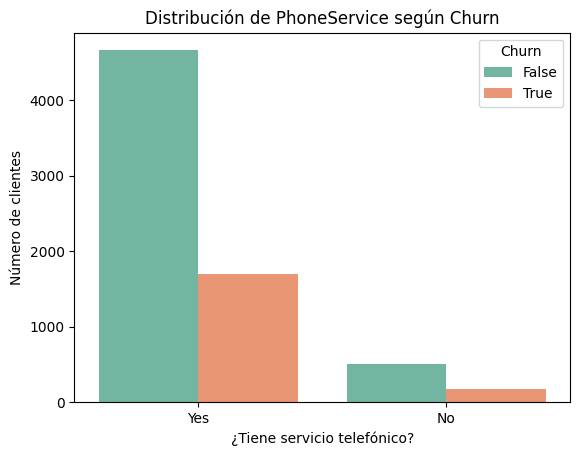

In [27]:
sns.countplot(data=datos, x='PhoneService', hue='Churn', palette='Set2')
plt.title("Distribución de PhoneService según Churn")
plt.xlabel("¿Tiene servicio telefónico?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_phoneservice_churn.png")
plt.show()


MultipleLines vs. Churn

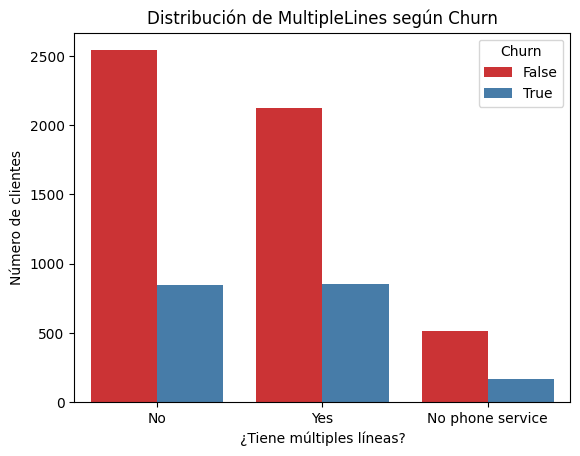

In [28]:
sns.countplot(data=datos, x='MultipleLines', hue='Churn', palette='Set1')
plt.title("Distribución de MultipleLines según Churn")
plt.xlabel("¿Tiene múltiples líneas?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_multiplelines_churn.png")
plt.show()


OnlineSecurity vs. Churn

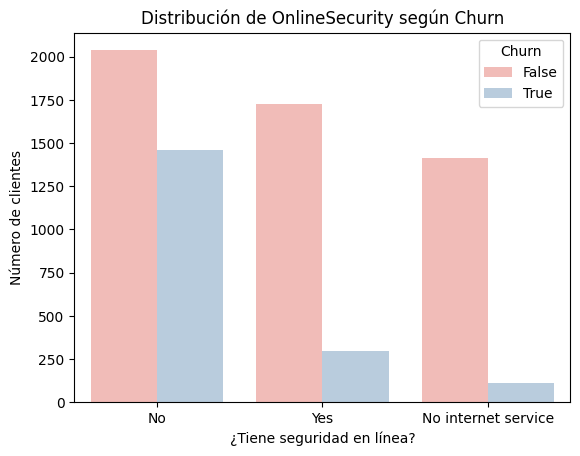

In [29]:
sns.countplot(data=datos, x='OnlineSecurity', hue='Churn', palette='Pastel1')
plt.title("Distribución de OnlineSecurity según Churn")
plt.xlabel("¿Tiene seguridad en línea?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_onlinesecurity_churn.png")
plt.show()


OnlineBackup vs. Churn

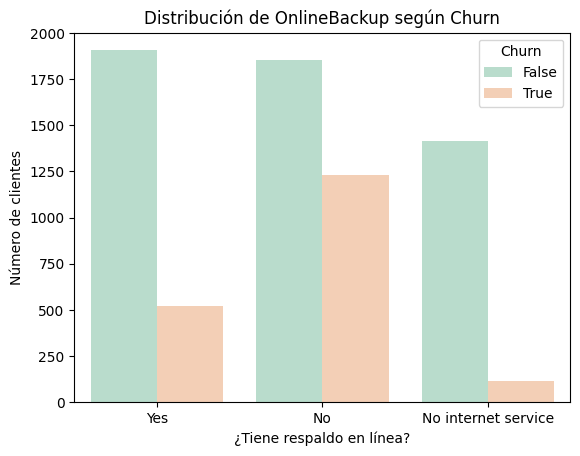

In [30]:
sns.countplot(data=datos, x='OnlineBackup', hue='Churn', palette='Pastel2')
plt.title("Distribución de OnlineBackup según Churn")
plt.xlabel("¿Tiene respaldo en línea?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_onlinebackup_churn.png")
plt.show()


DeviceProtection vs. Churn

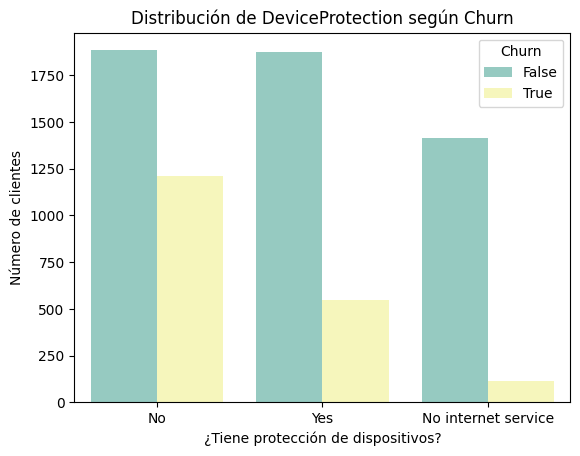

In [31]:
sns.countplot(data=datos, x='DeviceProtection', hue='Churn', palette='Set3')
plt.title("Distribución de DeviceProtection según Churn")
plt.xlabel("¿Tiene protección de dispositivos?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_deviceprotection_churn.png")
plt.show()


TechSupport vs. Churn

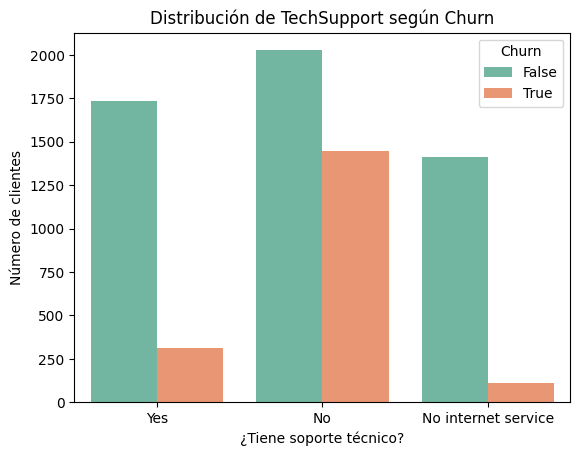

In [32]:
sns.countplot(data=datos, x='TechSupport', hue='Churn', palette='Set2')
plt.title("Distribución de TechSupport según Churn")
plt.xlabel("¿Tiene soporte técnico?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_techsupport_churn.png")
plt.show()


StreamingTV vs. Churn

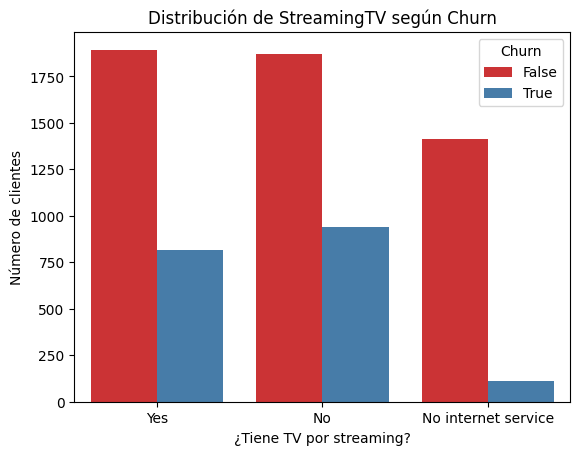

In [33]:
sns.countplot(data=datos, x='StreamingTV', hue='Churn', palette='Set1')
plt.title("Distribución de StreamingTV según Churn")
plt.xlabel("¿Tiene TV por streaming?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_streamingtv_churn.png")
plt.show()


StreamingMovies vs. Churn

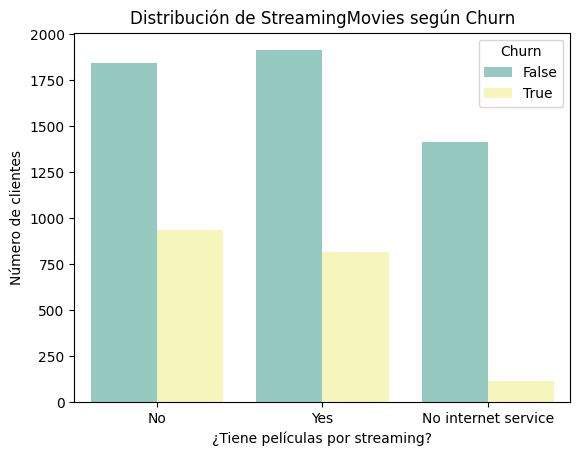

In [34]:
sns.countplot(data=datos, x='StreamingMovies', hue='Churn', palette='Set3')
plt.title("Distribución de StreamingMovies según Churn")
plt.xlabel("¿Tiene películas por streaming?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_streamingmovies_churn.png")
plt.show()


PaperlessBilling vs. Churn

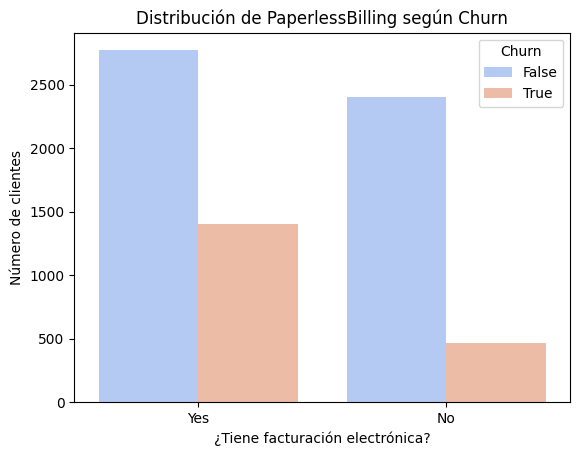

In [35]:
sns.countplot(data=datos, x='PaperlessBilling', hue='Churn', palette='coolwarm')
plt.title("Distribución de PaperlessBilling según Churn")
plt.xlabel("¿Tiene facturación electrónica?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_paperlessbilling_churn.png")
plt.show()


**Variables de Servicios Contratados**

(antes llamadas “secundarias”, pero tienen insights clave sobre comportamiento)

Estas variables reflejan qué servicios adicionales contrata el cliente:

- PhoneService	Casi todos los clientes lo tienen; no muestra variación relevante con churn.

- MultipleLines	Clientes con múltiples líneas tienen ligeramente más churn que los que no.

- OnlineSecurity	No tener seguridad en línea está fuertemente asociado con mayor churn.

- OnlineBackup	Tendencia similar: no contratarlo se asocia a mayor churn.

- DeviceProtection	Clientes sin protección de dispositivos tienen más churn, aunque con menos diferencia.

- TechSupport	No tener soporte técnico es un gran predictor de churn.

- StreamingTV	Tener o no TV por streaming no marca una gran diferencia, aunque los que no lo tienen cancelan más.

- StreamingMovies	Tendencia similar a StreamingTV, pero más neutral.

- PaperlessBilling	Clientes con facturación electrónica tienen más churn. Puede estar asociado a usuarios más activos/digital

**Interpretación general:**

Las variables de servicios adicionales son excelentes predictores de churn.
Especialmente:

    Falta de OnlineSecurity

    Falta de TechSupport

    No tener OnlineBackup

Estas variables podrían reflejar un menor compromiso con los servicios o descontento por la falta de valor agregado.

**Clasificación de variables propuesta**

| Grupo                               | Contenido                                                   |
| ----------------------------------- | ----------------------------------------------------------- |
| 🧑‍💼 **Perfil del cliente**        | gender, SeniorCitizen, Partner, Dependents                  |
| 📄 **Modelo de contrato**           | Contract, PaymentMethod, PaperlessBilling                   |
| 🌐 **Tipo de servicio base**        | InternetService, PhoneService, MultipleLines                |
| 🛡️ **Servicios adicionales**       | OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport |
| 📺 **Servicios de entretenimiento** | StreamingTV, StreamingMovies                                |


### Conclusión Fase 0



Durante esta etapa inicial se exploraron las características principales del conjunto de datos, incluyendo la distribución y relación de variables numéricas y categóricas con la variable objetivo Churn. Este análisis permitió identificar patrones clave, así como variables con bajo o nulo aporte informativo.

Como resultado, se decidió eliminar las siguientes tres columnas:

    TotalCharges: Esta variable representa el acumulado total pagado por el cliente y está directamente derivada de MonthlyCharges × tenure. Dado que ambas variables base ya están presentes y activas, TotalCharges se considera redundante.

    Cuentas_diarias: Se trata de una variable artificial generada para resolver un proyecto anterior, sin conexión real con la lógica del negocio o el comportamiento del cliente. Por lo tanto, se elimina por no aportar valor al análisis actual.

    PhoneService: El análisis gráfico reveló que esta variable presenta una distribución altamente sesgada, con la mayoría de los clientes teniendo el mismo valor (“Yes”). Su baja variabilidad y escasa relación con el Churn justifican su exclusión en esta etapa.

Estas eliminaciones no solo simplifican el modelo de datos, sino que refuerzan el principio de parsimony, manteniendo únicamente aquellas variables con potencial valor predictivo o estratégico.

El conjunto de datos limpio se almacena como datos_v1 y servirá como base para la siguiente fase del proyecto.

In [36]:
# Eliminamos columnas irrelevantes
columnas_a_eliminar = ['TotalCharges', 'Cuentas_diarias', 'PhoneService']
datos_v1 = datos.drop(columns=columnas_a_eliminar)

# Verificamos las columnas resultantes
print("Columnas restantes:", datos_v1.columns.tolist())
print("Shape del nuevo dataframe:", datos_v1.shape)


Columnas restantes: ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']
Shape del nuevo dataframe: (7043, 18)


## FASE 1: Preparación de los Datos (Limpieza y Codificación)

### 1.1 Verificación de tipos de datos

In [37]:
datos_v1.dtypes

,0
Churn,bool
gender,object
SeniorCitizen,bool
Partner,object
Dependents,object
tenure,int64
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


### 1.2 Confirmación de valores nulos

In [38]:
datos_v1.isnull().sum()

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


### 1.3 Codificación de variables categóricas y separación de las "features" con el "targetr"

Al hacer el dropped de las columnas, las variables de typo Category se transformaron en objeto nuevamente. Antes de la codificación para el modelo se revierten a categoría.

In [39]:
# Convertir columnas object a category en datos_v1
object_columns_v1 = datos_v1.select_dtypes(include=['object']).columns
for col in object_columns_v1:
    datos_v1[col] = datos_v1[col].astype('category')

# Crear datos_v2 como una copia de datos_v1
datos_v2 = datos_v1.copy()

# Verificación de tipos de datos en datos_v2
print("Tipos de datos en datos_v2 después de la conversión:")
print(datos_v2.dtypes)

# Guardar el DataFrame datos_v2
output_filename_v2 = 'datos_v2.csv'
datos_v2.to_csv(output_filename_v2, index=False)
print(f"\nDataFrame guardado como '{output_filename_v2}'")

Tipos de datos en datos_v2 después de la conversión:
Churn                   bool
gender              category
SeniorCitizen           bool
Partner             category
Dependents          category
tenure                 int64
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
dtype: object

DataFrame guardado como 'datos_v2.csv'


In [40]:
# Identify columns with exactly two categories
two_category_cols = [col for col in datos_v2.columns if datos_v2[col].nunique() == 2]

# Add 'SeniorCitizen' if it's not already in the list (it should be)
if 'SeniorCitizen' not in two_category_cols:
    two_category_cols.append('SeniorCitizen')

print("Variables with exactly two categories (including SeniorCitizen):")
print(two_category_cols)

Variables with exactly two categories (including SeniorCitizen):
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling']


In [41]:
# Identify categorical columns in datos_v2
categorical_cols_v2 = datos_v2.select_dtypes(include=['category']).columns

# Filter for columns with 3 or more unique categories
three_plus_categories = [col for col in categorical_cols_v2 if datos_v2[col].nunique() >= 3]

print("Variables with 3 or more categories:")
print(three_plus_categories)

Variables with 3 or more categories:
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


Tenemos múltiples variables categóricas (tipo category o object) que necesitan transformarse para alimentar los modelos.
Estrategia:

    Si la variable tiene 2 categorías → LabelEncoder

    Si tiene 3 o más → One-hot encoding (sin crear columna dummy para evitar multicolinealidad)

Variables con 2 categorías (label encoding):

    gender

    Partner

    Dependents

    OnlineSecurity

    OnlineBackup

    DeviceProtection

    TechSupport

    StreamingTV

    StreamingMovies

    PaperlessBilling


Variables con 3 o más categorías (one-hot encoding):

    MultipleLines
    
    InternetService
    
    OnlineSecurity
    
    OnlineBackup
    
    DeviceProtection
    
    TechSupport
    
    StreamingTV
    
    StreamingMovies
    
    Contract
    
    PaymentMethod

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Separate target variable
y = datos_v2['Churn']
X = datos_v2.drop('Churn', axis=1)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['category']).columns

# Apply Label Encoding for binary categorical columns
label_encode_cols = [col for col in categorical_cols if X[col].nunique() == 2]
for col in label_encode_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Apply One-Hot Encoding for categorical columns with more than 2 categories
one_hot_encode_cols = [col for col in categorical_cols if X[col].nunique() > 2]
X = pd.get_dummies(X, columns=one_hot_encode_cols, drop_first=True)

# Convert boolean columns (SeniorCitizen) to int if not already handled by LabelEncoder
# LabelEncoder handles boolean, but double check
bool_cols = X.select_dtypes(include=['bool']).columns
for col in bool_cols:
    X[col] = X[col].astype(int)


# Display the first few rows and the data types of the transformed DataFrame
print("Transformed DataFrame (X) head:")
display(X.head())
print("\nTransformed DataFrame (X) dtypes:")
print(X.dtypes)
print("\nTarget variable (y) head:")
display(y.head())
print("\nTarget variable (y) dtypes:")
print(y.dtypes)

Transformed DataFrame (X) head:


,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,65.6,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1,1,0,0,0,9,0,59.9,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,4,1,73.9,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,13,1,98.0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,0,1,1,0,3,1,83.9,0,0,1,...,1,0,1,0,0,0,0,0,0,1



Transformed DataFrame (X) dtypes:
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PaperlessBilling                           int64
MonthlyCharges                           float64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No internet service            int64
TechSupport_Yes                            int64
StreamingTV_No internet service   

,Churn
0,False
1,False
2,True
3,True
4,True



Target variable (y) dtypes:
bool


In [43]:
# Save the transformed DataFrame X to a CSV file
output_filename_X = 'data.csv'
X.to_csv(output_filename_X, index=False)

print(f"Transformed DataFrame X saved as '{output_filename_X}'")

Transformed DataFrame X saved as 'data.csv'


### 1.4 Normalizando MonthlyCharges y tenure

In [44]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the DataFrame X (assuming it was saved as 'data.csv')
X = pd.read_csv('data.csv')

# Initialize the StandardScaler
scaler = StandardScaler()

# Identify the numerical columns to normalize
numerical_cols = ['tenure', 'MonthlyCharges']

# Apply StandardScaler to the numerical columns
# We fit and transform the selected columns and then replace them in the original DataFrame X
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Display the first few rows of the transformed DataFrame X to verify
print("Transformed DataFrame (X) head after normalization:")
display(X.head())

# Verify the mean and standard deviation of the normalized columns
print("\nMean of normalized numerical columns:")
print(X[numerical_cols].mean())
print("\nStandard deviation of normalized numerical columns:")
print(X[numerical_cols].std())

Transformed DataFrame (X) head after normalization:


,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,-0.951682,1,0.027862,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1,1,0,0,0,-0.951682,0,-0.161583,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.155283,1,0.303720,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,-0.788800,1,1.104706,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,0,1,1,0,-1.196004,1,0.636080,0,0,1,...,1,0,1,0,0,0,0,0,0,1



Mean of normalized numerical columns:
tenure           -2.824818e-17
MonthlyCharges   -6.658501e-17
dtype: float64

Standard deviation of normalized numerical columns:
tenure            1.000071
MonthlyCharges    1.000071
dtype: float64


In [45]:
# Save the transformed DataFrame X to a CSV file with the specified name
output_filename = 'data_2.csv'
X.to_csv(output_filename, index=False)

print(f"DataFrame with normalized numerical columns saved as '{output_filename}'")

DataFrame with normalized numerical columns saved as 'data_2.csv'


### 1.5 Checando el balance de los datos de Churn

In [46]:
# Check the distribution of the target variable 'Churn'
churn_distribution = y.value_counts()

print("Distribution of the 'Churn' variable:")
print(churn_distribution)

# Calculate the proportion of each class
churn_proportion = y.value_counts(normalize=True) * 100

print("\nProportion of each 'Churn' class:")
print(churn_proportion)

Distribution of the 'Churn' variable:
Churn
False    5174
True     1869
Name: count, dtype: int64

Proportion of each 'Churn' class:
Churn
False    73.463013
True     26.536987
Name: proportion, dtype: float64


El resultado muestra que aproximadamente el 73.5% de los clientes no se dio de baja (False), y aproximadamente el 26.5% sí se dio de baja (True). Esto indica que tu conjunto de datos está moderadamente desequilibrado. Lo cual impacta de la siguiente manera:


Elección de métricas de evaluación adecuadas: La precisión puede ser engañosa. Necesitaremos centrarnos en métricas que ofrezcan una mejor imagen del rendimiento del modelo en la clase minoritaria (Churn=True). Estas incluyen:

    Exhaustividad (Recall/Sensibilidad): De todos los clientes que realmente se dieron de baja, ¿cuántos identificó correctamente el modelo?

    Puntuación F1 (F1-Score): La media armónica de la Precisión y la Exhaustividad, proporcionando un equilibrio entre ambas.

    ROC-AUC: Mide la capacidad del modelo para distinguir entre las dos clases.

Considerar técnicas de remuestreo (Opcional): Dependiendo de los modelos que elijamos y de su rendimiento inicial, podríamos considerar técnicas para abordar el desequilibrio durante la fase de modelado. Estas incluyen:

    Sobremuestreo de la clase minoritaria: Crear ejemplos sintéticos de la clase minoritaria (por ejemplo, usando técnicas como SMOTE) para aumentar su representación en los datos de entrenamiento.

    Submuestreo de la clase mayoritaria: Eliminar aleatoriamente ejemplos de la clase mayoritaria para reducir su representación.

Podemos empezar entrenando modelos con los datos desequilibrados actuales y luego evaluar su rendimiento utilizando las métricas adecuadas. Si a los modelos les cuesta predecir la clase minoritaria, entonces podemos experimentar con técnicas de remuestreo para ver si mejora el rendimiento.

Así que, por ahora, tendremos en cuenta el desequilibrio, seleccionaremos las métricas de evaluación correctas para la Fase 4 y decidiremos sobre las técnicas de remuestreo si son necesarias durante o antes de la Fase 3 (Modelado).



## FASE 2: Análisis Exploratorio y Correlación


Comprender el comportamiento de las variables y su relación con la cancelación.


### 2.1 Verificación de Datos

Confirmar la estructura, ausencia de nulos y el resultado de las transformaciones en el DataFrame X.


In [47]:
# Check the shape of the transformed DataFrame X
print("Shape of the transformed DataFrame X:", X.shape)

# Check for any missing values in X
print("\nMissing values in the transformed DataFrame X:")
print(X.isnull().sum().sum())

# Check unique values and counts for a few transformed columns
print("\nUnique values and counts for selected transformed columns:")
for col in ['gender', 'SeniorCitizen', 'Partner', 'InternetService_Fiber optic', 'Contract_Two year']:
    if col in X.columns:
        print(f"\n--- {col} ---")
        print(X[col].value_counts())
    else:
        print(f"\n--- {col} ---")
        print(f"Column '{col}' not found in X.")

Shape of the transformed DataFrame X: (7043, 28)

Missing values in the transformed DataFrame X:
0

Unique values and counts for selected transformed columns:

--- gender ---
gender
1    3555
0    3488
Name: count, dtype: int64

--- SeniorCitizen ---
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

--- Partner ---
Partner
0    3641
1    3402
Name: count, dtype: int64

--- InternetService_Fiber optic ---
InternetService_Fiber optic
0    3947
1    3096
Name: count, dtype: int64

--- Contract_Two year ---
Contract_Two year
0    5348
1    1695
Name: count, dtype: int64


### 2.2 correlación de variables con churn

Calcular la correlación de todas las variables en X con la variable objetivo y (Churn) y presentar los resultados ordenados.

In [48]:
# Calculate correlations between features in X and the target y
correlations_with_churn = X.corrwith(y).sort_values(ascending=False)

# Print the sorted correlations
print("Correlations with Churn (sorted):")
print(correlations_with_churn)

Correlations with Churn (sorted):
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226
Contract_One year                       -0.177820
InternetService_

Del análisis de correlación, observamos que:

    Las variables con mayor correlación positiva con Churn (mayor probabilidad de cancelación) son InternetService_Fiber optic y PaymentMethod_Electronic check. Esto sugiere que los clientes con servicio de fibra óptica y aquellos que pagan con cheque electrónico tienden a cancelar más.
    
    
    Las variables con mayor correlación negativa con Churn (menor probabilidad de cancelación) son tenure (antigüedad del cliente) y Contract_Two year (contrato a dos años). Esto indica que los clientes con más tiempo en la empresa y aquellos con contratos a largo plazo son menos propensos a cancelar.
    
    
    Variables como gender y las relacionadas con MultipleLines mostraron correlaciones muy bajas, sugiriendo que tienen una relación lineal débil con la cancelación. Esto las convierte en posibles candidatas a ser consideradas menos importantes o incluso eliminadas en futuras etapas de modelado, aunque siempre es bueno reconfirmar su impacto en el modelo final.

En resumen, la antigüedad, el tipo de contrato, el servicio de internet y el método de pago parecen ser factores más fuertemente asociados con la probabilidad de que un cliente cancele su servicio.

### 2.3 matriz de correlación (heatmap)



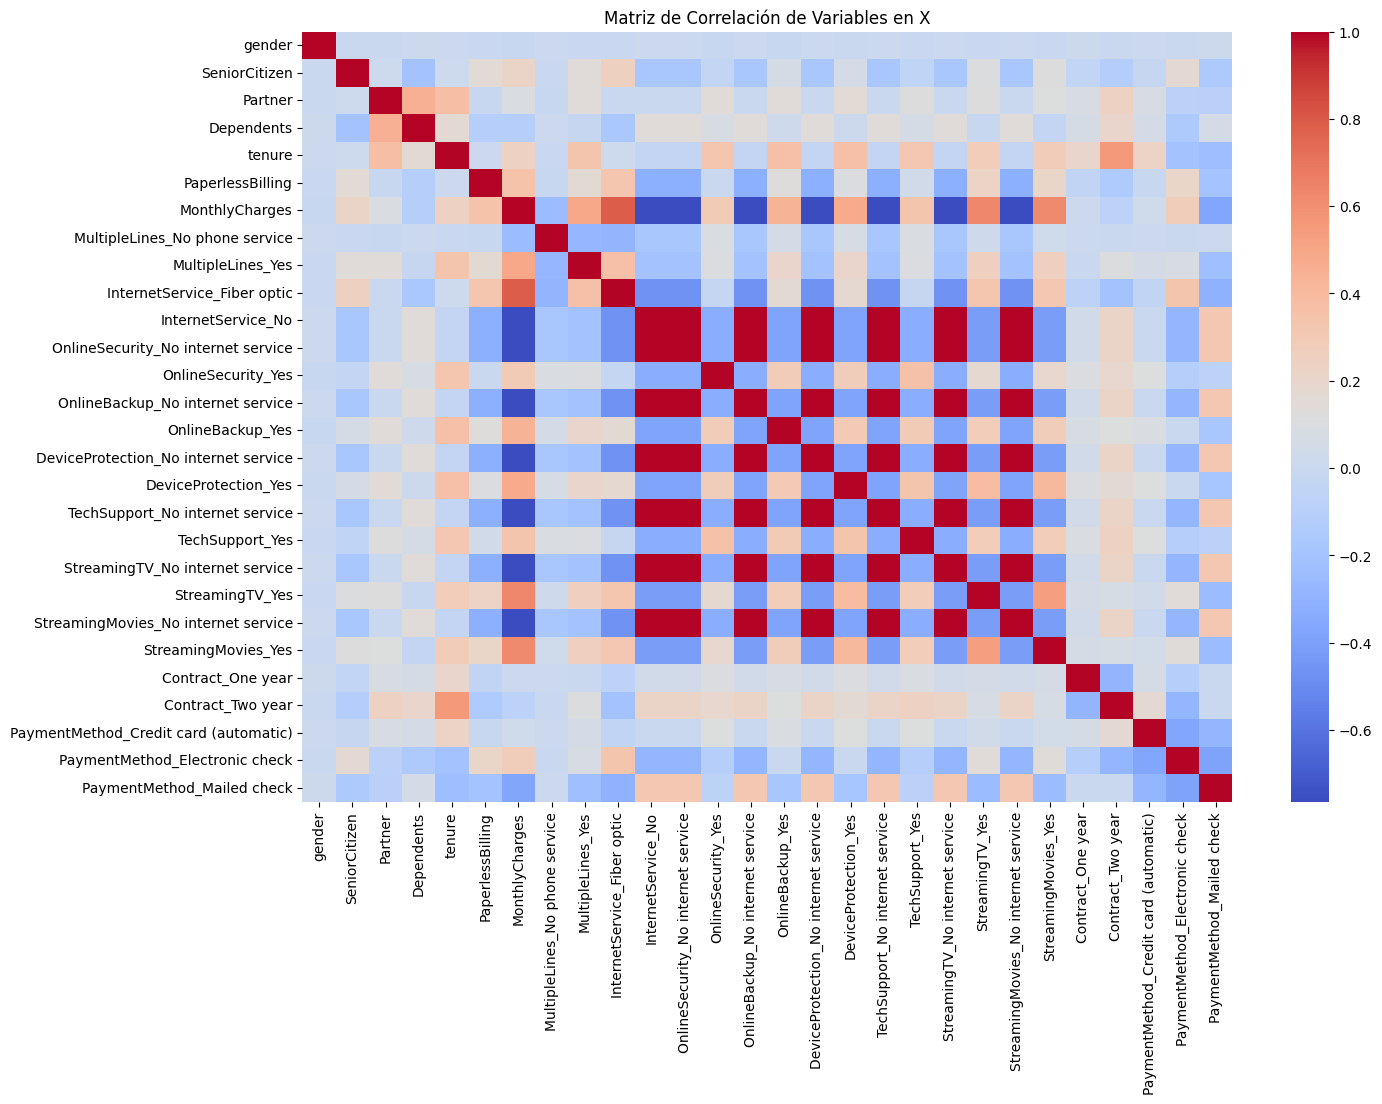

In [49]:
# Calculate the correlation matrix for the DataFrame X
correlation_matrix_X = X.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix_X, cmap='coolwarm', annot=False) # annot=False to avoid clutter
plt.title("Matriz de Correlación de Variables en X")

# Save the heatmap
plt.savefig("heatmap_correlation_X.png")

# Display the heatmap
plt.show()

### 2.4 Multicolinealidad

La multicolinealidad perfecta ocurre cuando dos o más variables predictoras en un modelo de regresión están perfectamente correlacionadas, lo que significa que una puede ser linealmente predicha a partir de la otra(s). Multicolinealidad ocasiona:

1.  **Inestabilidad del Modelo:** La multicolinealidad perfecta hace que sea imposible que el modelo de regresión (como la regresión logística que podríamos usar) estime de manera confiable los coeficientes de las variables. Esto se debe a que hay infinitas combinaciones de coeficientes que podrían explicar la varianza en la variable dependiente, lo que lleva a resultados inestables y poco fiables.

2.  **Interpretación Dificultosa:** Cuando las variables están perfectamente correlacionadas, es imposible determinar el efecto único de cada variable sobre la variable objetivo. El modelo no puede distinguir la contribución individual de cada predictor.

3.  **Redundancia:** Si dos variables tienen una correlación perfecta de 1 o -1, esencialmente están proporcionando la misma información al modelo. Mantener ambas es redundante y no añade valor predictivo, solo complejidad e inestabilidad.

En este caso, el análisis de correlación identificó pares de variables con una correlación absoluta de 1, como aquellas relacionadas con la ausencia de servicio de internet (`InternetService_No`) y la ausencia de varios servicios adicionales (como seguridad en línea, respaldo, etc.). Esto tiene sentido, ya que si un cliente no tiene servicio de internet, lógicamente tampoco tendrá servicios que dependan de internet. Para construir modelos estables y fáciles de interpretar, es necesario eliminar una de las variables de cada par perfectamente correlacionado.

In [50]:
import numpy as np

# Calculate the absolute values of the correlation matrix
abs_correlation_matrix = correlation_matrix_X.abs()

# Stack the correlation matrix to easily filter
stacked_correlations = abs_correlation_matrix.stack()

# Filter for correlations equal to 1, excluding the diagonal (correlation of a variable with itself)
# Get pairs with absolute correlation of 1
high_correlations = stacked_correlations[(stacked_correlations == 1) & (stacked_correlations.index.get_level_values(0) != stacked_correlations.index.get_level_values(1))]

# Print the pairs with perfect multicollinearity
print("Variables with perfect multicollinearity (absolute correlation = 1):")
if high_correlations.empty:
    print("No pairs with perfect multicollinearity found.")
else:
    # Remove duplicate pairs (e.g., (A, B) and (B, A))
    high_correlations = high_correlations.sort_index()
    unique_high_correlations = high_correlations[~high_correlations.index.duplicated()]
    print(unique_high_correlations)

Variables with perfect multicollinearity (absolute correlation = 1):
DeviceProtection_No internet service  InternetService_No                      1.0
                                      OnlineBackup_No internet service        1.0
                                      OnlineSecurity_No internet service      1.0
                                      StreamingMovies_No internet service     1.0
                                      StreamingTV_No internet service         1.0
                                      TechSupport_No internet service         1.0
InternetService_No                    DeviceProtection_No internet service    1.0
                                      OnlineBackup_No internet service        1.0
                                      OnlineSecurity_No internet service      1.0
                                      StreamingMovies_No internet service     1.0
                                      StreamingTV_No internet service         1.0
                             

In [52]:
# Identificar columnas con multicolinealidad perfecta basadas en el análisis previo
# Estas son las columnas dummy generadas para la categoría 'No internet service'
columns_to_drop_multicollinearity = [
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service'
]

# Asegurarse de que las columnas existan en el DataFrame X antes de eliminarlas
existing_columns_to_drop = [col for col in columns_to_drop_multicollinearity if col in X.columns]

# Eliminar las columnas identificadas por multicolinealidad perfecta del DataFrame X
X_cleaned = X.drop(columns=existing_columns_to_drop)

# Verificar las columnas restantes en el nuevo DataFrame
print("Columnas restantes después de eliminar la multicolinealidad:")
print(X_cleaned.columns.tolist())

# Verificar la forma del nuevo DataFrame
print("\nShape del DataFrame X_cleaned:", X_cleaned.shape)

# Guardar el DataFrame limpio con un nuevo nombre
output_filename_cleaned = 'model_x.csv'
X_cleaned.to_csv(output_filename_cleaned, index=False)
print(f"\nDataFrame limpio guardado como '{output_filename_cleaned}'")

Columnas restantes después de eliminar la multicolinealidad:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

Shape del DataFrame X_cleaned: (7043, 22)

DataFrame limpio guardado como 'model_x.csv'


**Carga y Exploración Inicial de Datos**

    - Importar el dataset desde el repositorio.

    - Verificar dimensiones, tipos de datos y valores nulos.

**Fase 0: Análisis Exploratorio Básico (Antes de la Limpieza)**

Objetivo: Realizar un análisis exploratorio para entender las distribuciones, detectar outliers, y obtener estadísticas descriptivas de los datos.

🪜 Pasos:

    Estadísticas descriptivas iniciales
    Obtener resumen de las estadísticas básicas (mean, std, min, max, etc.) para todas las variables numéricas, con especial atención a las variables como MonthlyCharges, TotalCharges, tenure, etc.

    Distribuciones de las variables numéricas
    Graficar distribuciones de las variables numéricas:

        - tenure

        - MonthlyCharges

        - TotalCharges
        
    Buscar outliers y patrones inusuales.

    Boxplots para detectar outliers
    Crear boxplots para identificar valores atípicos en las variables numéricas.

    Distribuciones de variables categóricas
    Graficar la distribución de las variables categóricas:

        - gender, SeniorCitizen, Partner, Dependents, etc.
        - Contar los valores únicos y sus frecuencias.

    Correlación de variables numéricas
    Generar un mapa de calor de correlación para observar qué variables numéricas están más correlacionadas entre sí.

**Fase 1: Preparación de los Datos (Limpieza y Codificación)**

Objetivo: Limpiar y transformar los datos para el análisis y modelado.
🪜 Pasos:

    Eliminar columnas innecesarias

        - Eliminar Cuentas_diarias

        - Eliminar TotalCharges por redundancia

    Conversión de variables categóricas

        - Convertir las variables tipo category en variables dummy (One-Hot Encoding)

    Separar variable objetivo y variables predictoras

        - Separar X (features) y y (target: Churn)

    Normalización de variables numéricas

        - Normalizar tenure y MonthlyCharges con StandardScaler

📁 Resultado:

    DataFrame resultante: datos_v3

    X e y preparados para el modelo

📊 Fase 2: Análisis Exploratorio y Correlación

Objetivo: Comprender el comportamiento de las variables y su relación con la cancelación.


🪜 Pasos:

    
    2.1 verificación de datos: Confirmar la estructura, ausencia de nulos y el resultado de las transformaciones en el DataFrame X.

    2.2 correlación de variables con churn: Calcular la correlación de todas las variables en X con la variable objetivo y (Churn) y presentar los resultados ordenados.

    2.3 matriz de correlación (heatmap): Generar y visualizar una matriz de correlación para todas las variables en X usando un heatmap, guardando la imagen.
    
    2.4 distribuciones de variables clave por churn: Seleccionar variables clave y visualizar sus distribuciones separadas por Churn usando gráficos apropiados, guardando cada gráfico.
    
    2.5 guardar dataframes: Asegurar que los DataFrames transformados X y y estén guardados para la siguiente fase.
    
    2.6 finish task: Resumir los hallazgos clave del análisis de correlación y distribuciones, destacando las variables con la relación más fuerte con Churn.



🤖 Fase 3: Modelado

Objetivo: Entrenar y comparar al menos dos modelos de clasificación.


🪜 Pasos:

    División de datos
    Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba).

    Entrenamiento de modelos
    Entrenar al menos dos modelos de clasificación:

        - RandomForestClassifier

        - LogisticRegression

📐 Fase 4: Evaluación de Modelos

Objetivo: Evaluar el desempeño de los modelos mediante métricas de clasificación.

🪜 Pasos:

    Evaluación métrica
    Evaluar los modelos utilizando métricas como Accuracy, Precision, Recall, F1, ROC-AUC.

    Gráficos de evaluación
    Crear gráficos de evaluación como:

        - Matrices de confusión para ambos modelos.

        - Curvas ROC para ambos modelos.

🧠 Fase 5: Interpretación y Conclusiones Estratégicas

Objetivo: Identificar las variables clave que impactan en la cancelación de clientes y proponer acciones estratégicas.

🪜 Pasos:

    Importancia de variables
    Visualizar las características más influyentes para la predicción de churn, usando la importancia de las variables en el modelo Random Forest.

    Redacción de insights estratégicos
    Analizar qué variables son más relevantes y qué estrategias se pueden proponer para reducir el churn.



### Eliminación de Columnas con Multicolinealidad Perfecta

